<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E5%B8%B8%E4%BD%BF%E7%94%A8%E7%9A%84%E5%9C%96%E8%A1%A8/%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%99%A3confusion_maxtrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
%pip install seaborn
%pip install matplotlib
%pip install wget

In [3]:
#下載中文字型
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

# 混淆矩陣的英文是Confusion Maxtrix

它是一種在機器學習中用來評估分類模型效能的表格。這個矩陣會顯示模型預測結果與實際類別之間的比較，具體來說，它會列出：

1. 真陽性 (True Positives, TP): 模型正確預測為「正類別」的樣本數。

2. 真陰性 (True Negatives, TN): 模型正確預測為「負類別」的樣本數。

3. 偽陽性 (False Positives, FP): 模型錯誤預測為「正類別」（但實際上是負類別）的樣本數，也稱為 Type I error。

4. 偽陰性 (False Negatives, FN): 模型錯誤預測為「負類別」（但實際上是正類別）的樣本數，也稱為 Type II error。

透過混淆矩陣，可以計算出模型的準確率 (Accuracy)、精確率 (Precision)、召回率 (Recall)、F1 分數 (F1-Score) 等多種評估指標，更全面地了解模型的表現。


混淆矩陣:
 [[6 2]
 [1 6]]


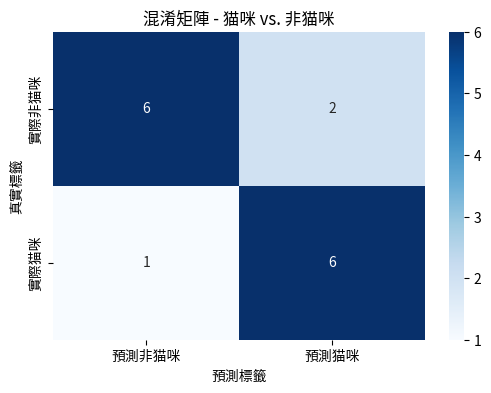


真陰性 (TN): 6
假陽性 (FP): 2
假陰性 (FN): 1
真陽性 (TP): 6


In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns # 輸出更漂亮的圖表
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 設置中文字體（確保圖表顯示中文）
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')


# 範例資料來自於「猫咪 vs. 非猫咪」的案例
# 實際標籤 (0: 非猫咪, 1: 猫咪)
y_true = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# 模型預測的標籤
y_pred = np.array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred)

print("混淆矩陣:\n", cm)

# 也可以視覺化
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['預測非猫咪', '預測猫咪'],
            yticklabels=['實際非猫咪', '實際猫咪'])
plt.xlabel('預測標籤')
plt.ylabel('真實標籤')
plt.title('混淆矩陣 - 猫咪 vs. 非猫咪')
plt.show()

# 明確顯示 TN, FP, FN, TP（二分類用）
tn, fp, fn, tp = cm.ravel() # .ravel() 將 2x2 矩陣展平

print(f"\n真陰性 (TN): {tn}")
print(f"假陽性 (FP): {fp}")
print(f"假陰性 (FN): {fn}")
print(f"真陽性 (TP): {tp}")